In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('/workspaces/Practise-Code/Kaggle Project/Data/kc_house_data_clean.csv')
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

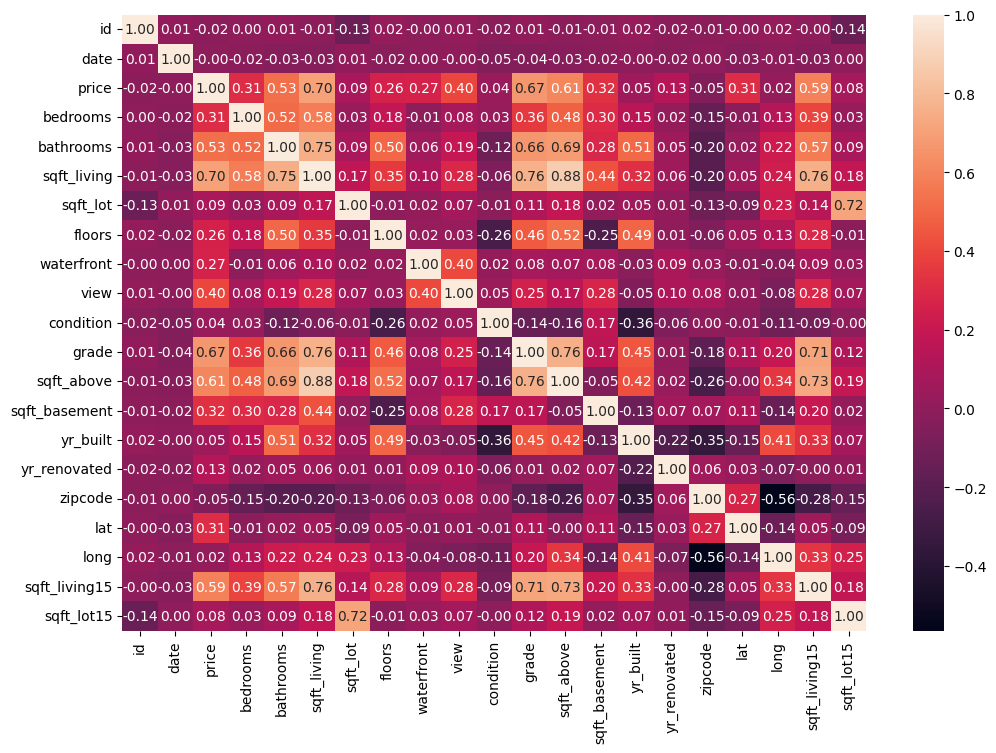

In [11]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

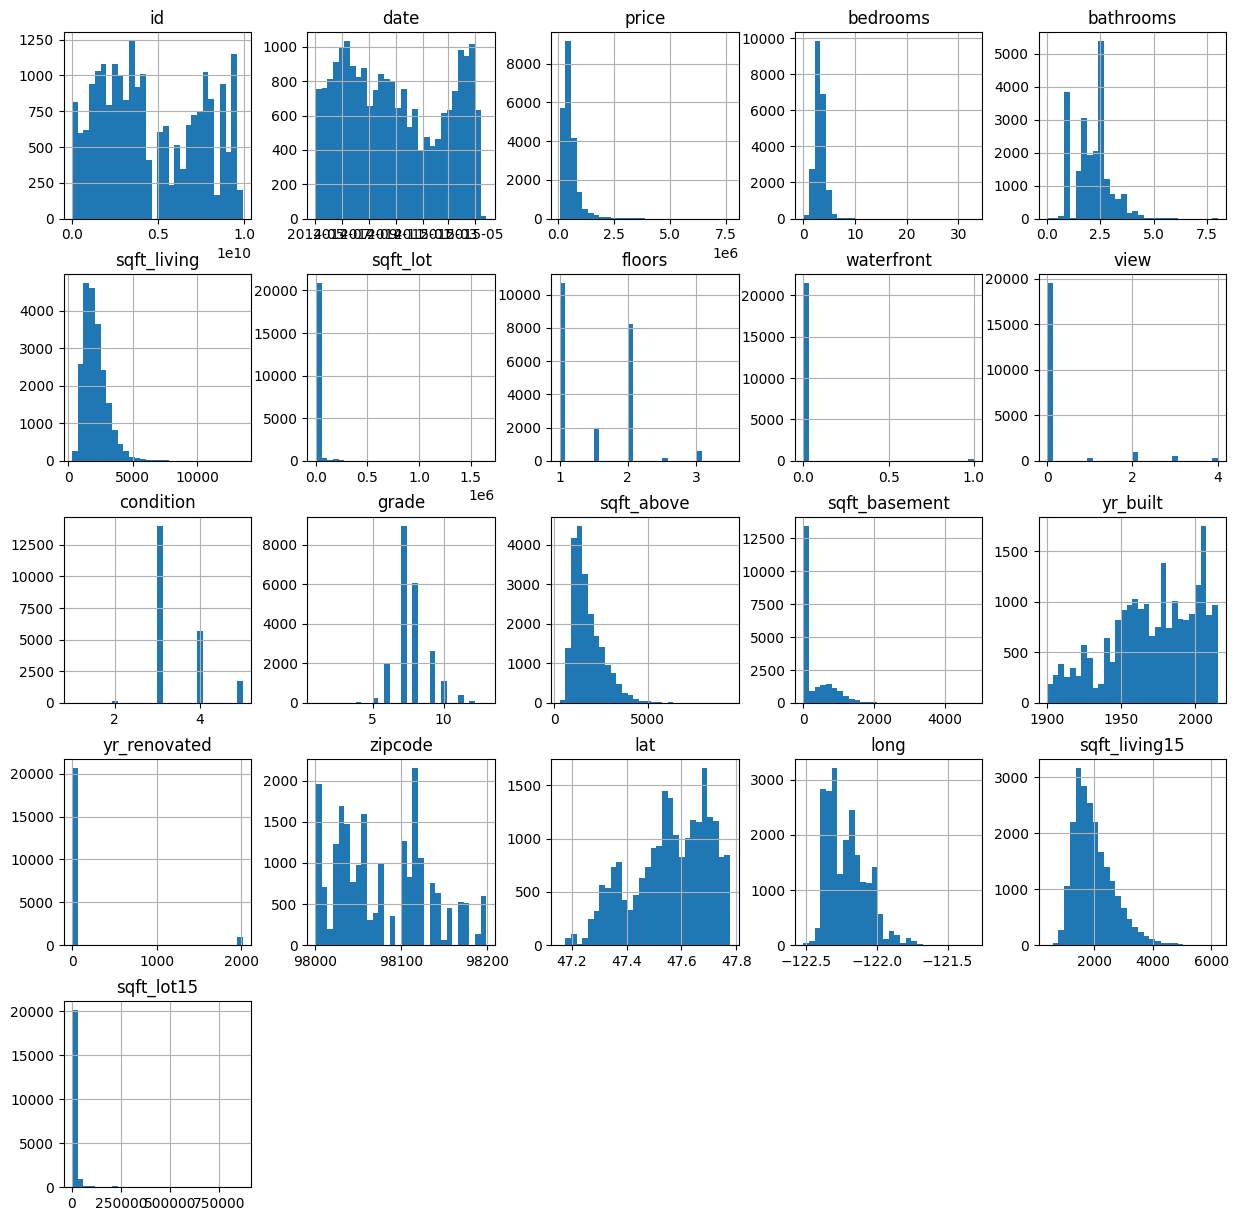

In [13]:
df.hist(bins=30, figsize=(15, 15))
plt.show()


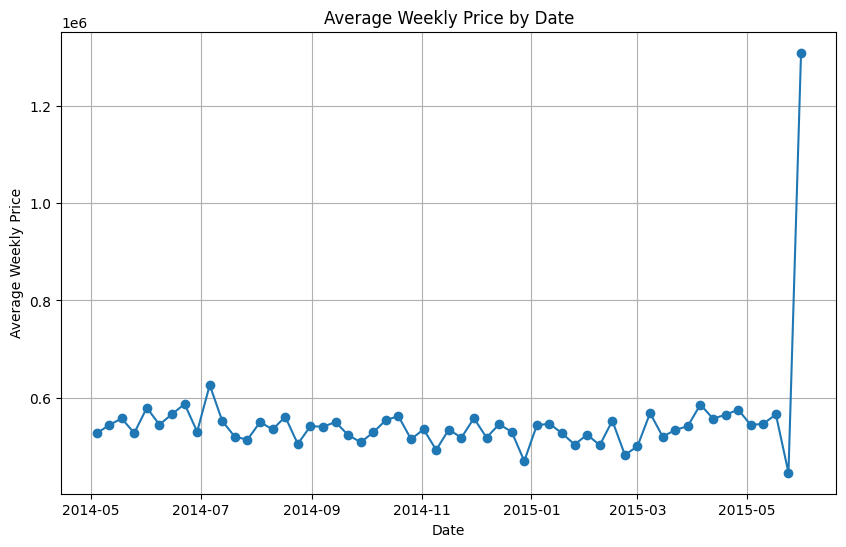

In [20]:
df_sales_by_date = df.groupby('date')['price'].sum().reset_index()

df.set_index('date', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df_sales_by_week['date'], df_sales_by_week['price'], marker='o')
plt.xlabel('Date')
plt.ylabel('Average Weekly Price')
plt.title('Average Weekly Price by Date')
plt.grid(True)
plt.show()

